<a href="https://colab.research.google.com/github/RiveroMilagros/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random

# Define the number of rows
num_rows = 100

# Generate random names
first_names = ['Juan', 'María', 'Pedro', 'Ana', 'Luis', 'Sofía', 'Carlos', 'Laura', 'Javier', 'Isabel']
last_names = ['González', 'Rodríguez', 'Pérez', 'López', 'Sánchez', 'Martínez', 'García', 'Fernández', 'Torres', 'Romero']
names = [f"{random.choice(first_names)} {random.choice(last_names)}" for _ in range(num_rows)]

# Generate random DNI numbers
dni_numbers = [random.randint(10000000, 50000000) for _ in range(num_rows)]

# Define school subjects
subjects = ['Matemática', 'Lengua', 'Historia', 'Geografía', 'Biología', 'Química', 'Física', 'Inglés']

# Generate random grades and absences
grades_1 = np.random.randint(1, 10, size=num_rows)
grades_2 = np.random.randint(1, 10, size=num_rows)
grades_3 = np.random.randint(1, 10, size=num_rows)
absences = np.random.randint(0, 30, size=num_rows)

# Create the DataFrame
df = pd.DataFrame({
    'Apellido y Nombre': names,
    'nro_dni': dni_numbers,
    'Materia Escolar': np.random.choice(subjects, size=num_rows),
    'Nota 1er Trimestre': grades_1,
    'Nota 2do Trimestre': grades_2,
    'Nota 3er Trimestre': grades_3,
    'Faltas a clases': absences
})

# Display the DataFrame
df.head()  # Display the first few rows

,Apellido y Nombre,nro_dni,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Laura Pérez,29876941,Química,8,1,1,23
1,Carlos Romero,26909960,Química,4,5,9,27
2,Laura Torres,20432007,Lengua,9,7,2,14
3,María Romero,30194918,Lengua,2,6,7,13
4,Pedro Martínez,41976489,Matemática,4,5,4,18


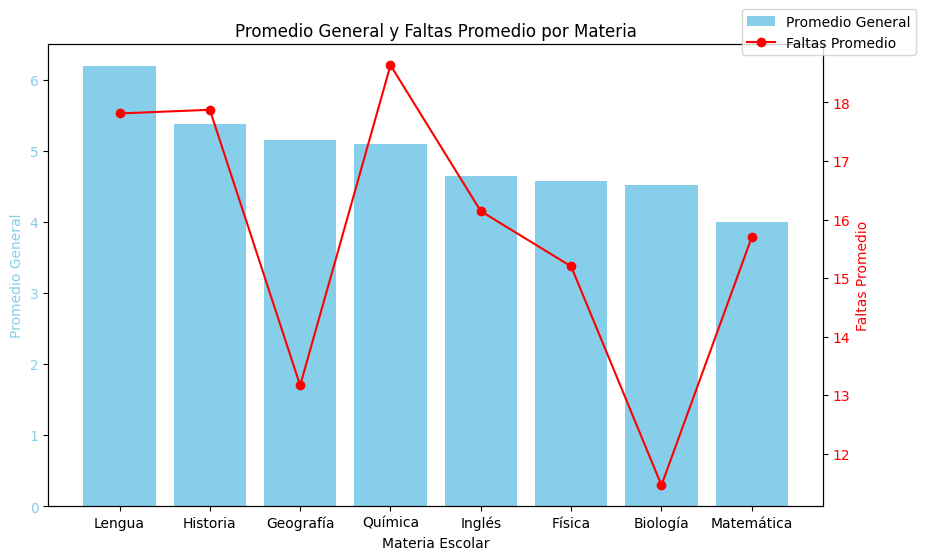

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate average grades for each subject
subject_avg_grades = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)
subject_avg_grades = subject_avg_grades.sort_values(ascending=False)

# Calculate average absences for each subject
subject_avg_absences = df.groupby('Materia Escolar')['Faltas a clases'].mean()
subject_avg_absences = subject_avg_absences.reindex(subject_avg_grades.index) # Order absences to match grade order

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primary axis for average grades
ax1.bar(subject_avg_grades.index, subject_avg_grades.values, color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia Escolar')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params('y', labelcolor='skyblue')

# Secondary axis for average absences
ax2 = ax1.twinx()
ax2.plot(subject_avg_absences.index, subject_avg_absences.values, color='red', marker='o', label='Faltas Promedio')
ax2.set_ylabel('Faltas Promedio', color='red')
ax2.tick_params('y', labelcolor='red')

# Add legends and title
plt.title('Promedio General y Faltas Promedio por Materia')
fig.legend(loc='upper right', bbox_to_anchor=(1, 0.95))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()

# Sección nueva